# Aim

`Data preparation and Data integration`  
`unsupervised clustering`      
`simple linear regression`    
`how to find relationship between countries publications with countries gdp ?`   

**References**    

Tf-idf http://www.tfidf.com/  
Clustering https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a  


### Include Packages, Create Pandas Dataframe and Merge Datasets

- Merge 2 different datasets (WHO Report and WorldBank Economy Report)
- Link by Country
- Combine these datasets and filter by country

In [3]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Excel Files
who_report_file='test_data/who-report.xlsx'
economy_file='test_data/worldbank-economy.xlsx'

# Read Excel Files and create DataFrame
who_report = pd.read_excel(who_report_file, index_col=0)
economy = pd.read_excel(economy_file, index_col=0)

# Merge Excel with same columns
merged = pd.merge(left=who_report, right=economy, left_on='Country', right_on='Country')
merged.head(10)

,Pub. with AMR and Country,Pub. With Country,Relative importance,TF \n(pub. counts with keyword/total with keywords),IDF \nlog(total pub./pub. with keywords),TF-IDF,(P01A) Agents against amoebiasis and other protozoal diseases,(P01A) %,(J01X) Other antibacterials,(J01X) %,...,Total2,Population millions,Surface area sq. km thousands,Population density people per sq. km,Gross national income (billions $),Gross national income per capita $,Purchasing power parity gross national income $ billions,Unnamed: 7,Gross domestic product % growth,$per capita % growth per capita
Country,,,,,,,,,,,,,,,,,,,,,
Canada,357,22673,0.015746,0.088476,1.230488,0.108868,0.30,0.017,0.90,0.052,...,17.05,37.1,9984.7,4,1665.6,44940,1763.6,47590,1.9,0.5
Brazil,342,35787,0.009557,0.084758,1.032272,0.087494,0.00,0.000,0.11,0.004,...,22.75,209.5,8515.8,25,1915.3,9140,3320.4,15850,1.1,0.3
Japan,315,39093,0.008058,0.078067,0.993898,0.077591,0.00,0.000,0.15,0.010,...,14.19,126.5,378.0,347,5226.6,41310,5615.7,44380,0.8,1.0
"Iran, Islamic Rep.",307,16941,0.018122,0.076084,1.357058,0.103251,2.59,0.066,0.33,0.008,...,38.78,81.8,1745.2,50,441.0,5470,1698.2,21050,3.8,2.3
Spain,235,18249,0.012877,0.058240,1.324758,0.077154,0.74,0.041,0.47,0.026,...,17.96,46.7,505.9,94,1371.0,29340,1859.8,39800,2.4,2.1
Germany,213,18482,0.011525,0.052788,1.319248,0.069641,1.68,0.146,0.45,0.039,...,11.49,82.9,357.6,237,3905.3,47090,4524.5,54560,1.5,1.2
Italy,207,19895,0.010405,0.051301,1.287253,0.066038,0.58,0.021,0.85,0.031,...,26.62,60.4,301.3,205,2038.4,33730,2555.4,42290,0.8,1.0
France,172,15803,0.010884,0.042627,1.387258,0.059135,3.28,0.126,0.59,0.022,...,25.92,67.0,549.1,122,2752.0,41080,3105.7,46360,1.7,1.5
Turkey,122,15172,0.008041,0.030235,1.404955,0.042479,1.30,0.034,1.48,0.038,...,38.18,82.3,785.4,107,858.1,10420,2275.3,27640,2.8,1.3


### Linear Regression Model

Correlation coefficient: [[85.16895001]]
intercept: [643.37364168]


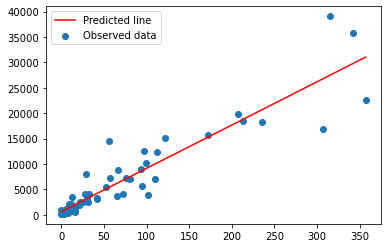

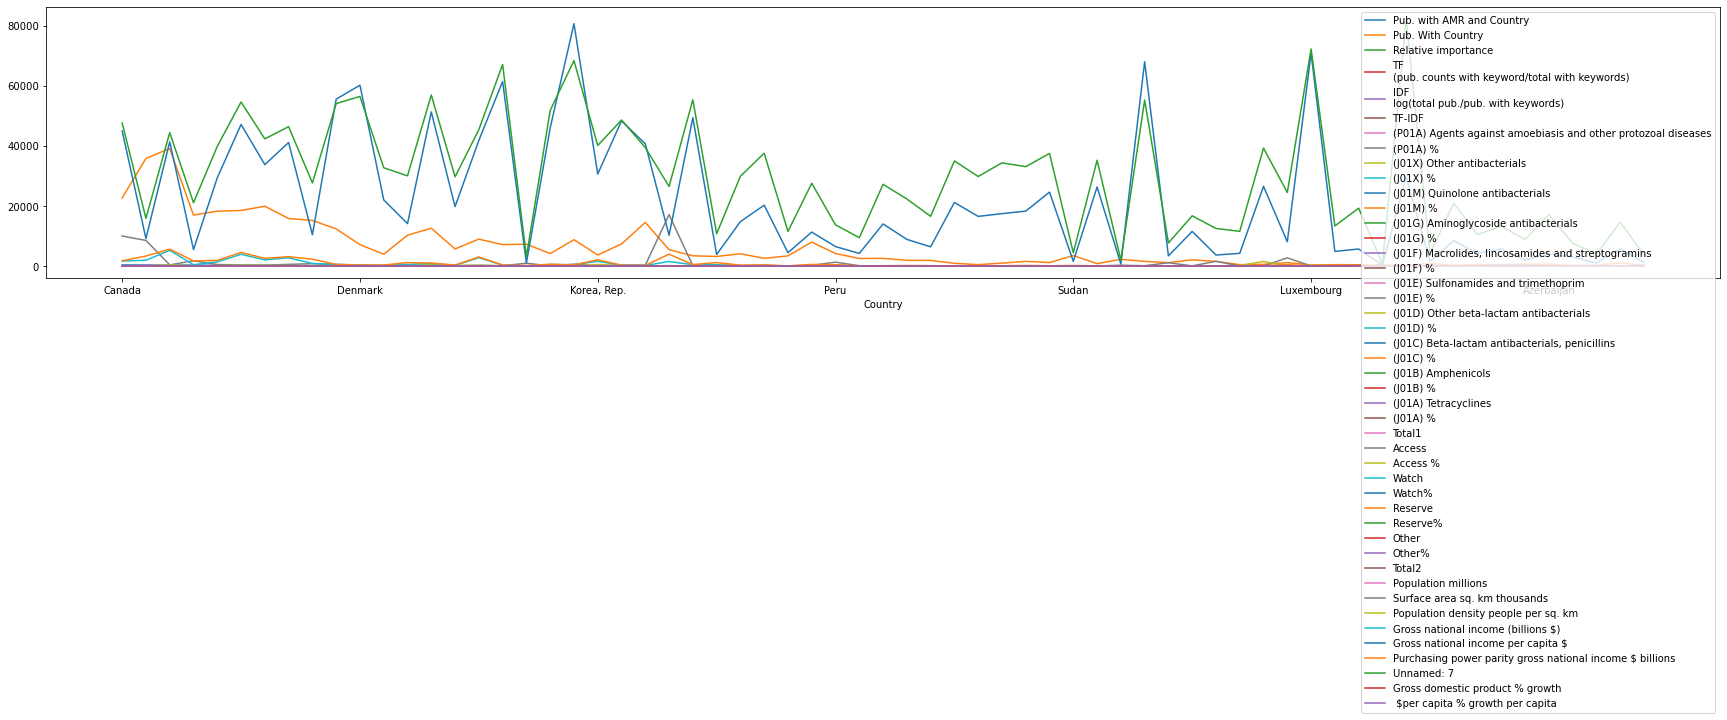

In [4]:
# 0 Row Count ,1 Column Count
row_count = merged.shape[0] 

# Get Values and Reshape
x = merged['Pub. with AMR and Country'].values.reshape(row_count, 1)
y = merged['Pub. With Country'].values.reshape(row_count, 1)

# Create LinearRegression
model = linear_model.LinearRegression()
model.fit(x, y)

print("Correlation coefficient:", model.coef_)
print("intercept:", model.intercept_)
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

merged.plot(figsize=(30,5))

# Unsupervised Clustering with K-Means

#### Create Plot and Find Cluster Size with ELBOW method


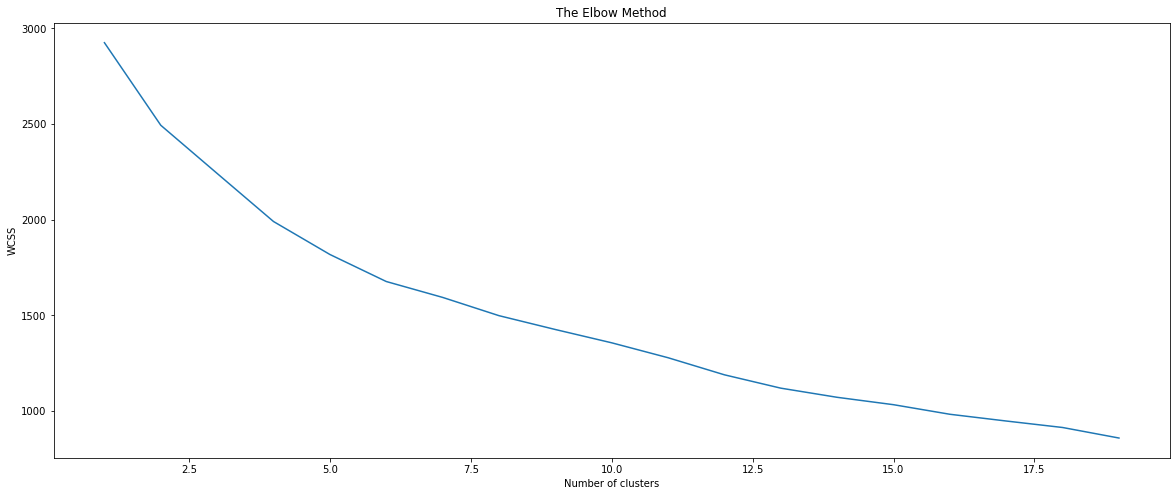

In [5]:
dataset1_standardized = preprocessing.scale(merged)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

# find the appropriate cluster number
plt.figure(figsize=(20, 8))
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

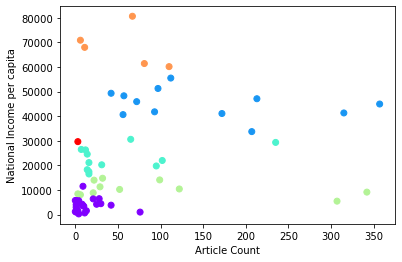

In [6]:
x = merged['Pub. with AMR and Country'].values.reshape(row_count, 1)
y = merged['Gross national income per capita $'].values.reshape(row_count, 1)

kmeans = KMeans(6)
kmeans.fit(merged)
merged['predict'] = kmeans.fit_predict(merged)
plt.scatter(merged['Pub. with AMR and Country'],merged['Gross national income per capita $'],c=merged['predict'],cmap='rainbow')
plt.xlabel('Article Count')
plt.ylabel('National Income per capita')
plt.show()

In [8]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
predict = kmeans.fit_predict(dataset1_standardized)

# Adding cluster to the Dataset1
merged['cluster'] = predict

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(merged.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Pub. with AMR and Country,Pub. With Country,Relative importance,TF \n(pub. counts with keyword/total with keywords),IDF \nlog(total pub./pub. with keywords),TF-IDF,(P01A) Agents against amoebiasis and other protozoal diseases,(P01A) %,(J01X) Other antibacterials,(J01X) %,...,Population millions,Surface area sq. km thousands,Population density people per sq. km,Gross national income (billions $),Gross national income per capita $,Purchasing power parity gross national income $ billions,Unnamed: 7,Gross domestic product % growth,$per capita % growth per capita,predict
cluster,,,,,,,,,,,,,,,,,,,,,
0,232.2,20754.3,0.0,0.1,1.3,0.1,1.2,0.1,0.6,0.0,...,93.9,4022.1,120.0,2167.5,27275.0,3066.8,36599.0,1.9,1.4,1.9
1,3.0,779.3,0.0,0.0,2.7,0.0,1.2,0.1,0.5,0.0,...,20.4,1086.3,68.0,84.8,4713.3,302.5,16786.7,3.5,2.2,1.0
2,11.2,1311.2,0.0,0.0,2.7,0.0,0.8,0.1,0.7,0.0,...,14.5,237.7,105.5,58.1,7972.9,139.9,17135.3,4.3,3.3,0.6
3,9.0,1562.0,0.0,0.0,2.4,0.0,5.4,0.1,0.9,0.0,...,3.2,1564.1,2.0,11.6,3660.0,39.6,12500.0,7.2,5.3,0.0
4,71.5,8269.8,0.0,0.0,1.7,0.0,2.9,0.2,1.8,0.1,...,18.8,223.0,136.9,601.5,46156.4,693.8,46394.5,2.1,1.0,1.9
5,31.2,2642.4,0.0,0.0,2.4,0.0,1.6,0.1,0.6,0.0,...,10.5,128.5,175.8,170.5,19814.8,264.6,30053.0,3.9,3.3,1.7
